In [1]:
from matplotlib import pyplot as plt
import numpy as np
import qiskit
import qiskit_aer
import warnings

# Exercise 5 and 6: Time evolution operator $U(t)$, without and with noise

In [2]:
import qiskit.circuit

def time_evolve(circ:qiskit.circuit.QuantumCircuit,t:float,dt:float,w:float,w0:float,w1) -> qiskit.circuit.QuantumCircuit:
    """Applying the time evolution operator `U` to the circuit `circ`."""
    if not np.isclose(t/dt,int(t/dt)): warnings.warn("dt does not divide t!")

    N = int(t/dt)

    for iTrotter in range(N):
        theta_z = -w0 * dt
        theta_x = 2 * w1 * dt * np.cos(w * iTrotter * dt)
        circ.rx(theta_x,0)
        circ.rz(theta_z,0)
    
    return circ

In [3]:
# exact simulator
import qiskit.providers
import qiskit.providers.fake_provider

sim = qiskit_aer.AerSimulator()

# noisy simulator
p = 0.1
gamma = 0.02
GAD = qiskit_aer.noise.amplitude_damping_error(gamma,p)
noise = qiskit_aer.noise.NoiseModel()
noise.add_all_qubit_quantum_error(error=GAD,instructions=["rx","rz"])
sim_noise = qiskit_aer.AerSimulator(noise_model=noise)

# fake provider
sim_fake = qiskit.providers.fake_provider.Fake5QV1()

In [4]:
# (5a) for different t
w = 25.5
w0 = 25
w1 = 2
dt = 0.05
nShots = 400
tAxis_a = np.linspace(start=0,stop=4,num=300)
populations_a = np.zeros(shape=(tAxis_a.shape[0],3))

for i,t in enumerate(tAxis_a):
    circ = qiskit.QuantumCircuit(1,1)
    # adding the time evolution
    circ = time_evolve(circ,t,dt,w,w0,w1)
    # adding the measurement
    circ.measure(qubit=0,cbit=0)

    # running the noiseless circuit 400 times
    populations_a[i,0] = sim.run(circ,shots=nShots).result().get_counts(circ).get("1")
    # running the noisy circuit 400 times
    populations_a[i,1] = sim_noise.run(circ,shots=nShots).result().get_counts(circ).get("1")
    # running the circuit on the fake backend 400 times
    populations_a[i,2] = sim_fake.run(run_input=circ,shots=nShots).result().get_counts(circ).get("1")

/var/folders/xd/w75n_hkn7yxdt_5lc6n52n0m0000gn/T/ipykernel_42216/2714627518.py:5: UserWarning: dt does not divide t!
  if not np.isclose(t/dt,int(t/dt)): warnings.warn("dt does not divide t!")


In [5]:
# (6,7) smaller dt
w = 25.5
w0 = 25
w1 = 2
dt = 0.01
nShots = 400
tAxis_67 = np.linspace(start=0,stop=4,num=300)
populations_67 = np.zeros(shape=(tAxis_67.shape[0],3))

for i,t in enumerate(tAxis_67):
    circ = qiskit.QuantumCircuit(1,1)
    # adding the time evolution
    circ = time_evolve(circ,t,dt,w,w0,w1)
    # adding the measurement
    circ.measure(qubit=0,cbit=0)

    # running the noiseless circuit 400 times
    populations_67[i,0] = sim.run(circ,shots=nShots).result().get_counts(circ).get("1")
    # running the noisy circuit 400 times
    populations_67[i,1] = sim_noise.run(circ,shots=nShots).result().get_counts(circ).get("1")
    # running the circuit on the fake backend 400 times
    populations_67[i,2] = sim_fake.run(run_input=circ,shots=nShots).result().get_counts(circ).get("1")

/var/folders/xd/w75n_hkn7yxdt_5lc6n52n0m0000gn/T/ipykernel_42216/2714627518.py:5: UserWarning: dt does not divide t!
  if not np.isclose(t/dt,int(t/dt)): warnings.warn("dt does not divide t!")


In [6]:
# (5b) for different detunings delta = w - w0
w0 = 25
w1 = 2
dt = 0.05
nShots = 400
t = np.pi / w1
wAxis_b = np.linspace(start=10,stop=40,num=300)
populations_b = np.zeros(shape=(wAxis_b.shape[0],2))
for i,w in enumerate(wAxis_b):
    circ = qiskit.QuantumCircuit(1,1)
    # adding the time evolution
    circ = time_evolve(circ,t,dt,w,w0,w1)
    # adding the measurement
    circ.measure(qubit=0,cbit=0)

    # running the circuit 400 times
    populations_b[i,0] = sim.run(circ,shots=nShots).result().get_counts(circ).get("1")

# analytical solution
delta = wAxis_b - w0
omega = np.sqrt(w1**2 + delta**2)
populations_b[:,1] = (w1**2) * np.sin(np.pi * omega / (2 * w1))**2 / omega**2

/var/folders/xd/w75n_hkn7yxdt_5lc6n52n0m0000gn/T/ipykernel_42216/2714627518.py:5: UserWarning: dt does not divide t!
  if not np.isclose(t/dt,int(t/dt)): warnings.warn("dt does not divide t!")


In [67]:
# (5c) w = w0 = w1 = 2
w = 2
w0 = 2
w1 = 2
dt = 0.05
nShots = 400
tAxis_c = np.linspace(start=0,stop=4,num=300)
populations_c = np.zeros(shape=(tAxis_c.shape[0],2))
for i,t in enumerate(tAxis_c):
    circ = qiskit.QuantumCircuit(1,1)
    # adding the time evolution
    circ = time_evolve(circ,t,dt,w,w0,w1)
    # adding the measurement
    circ.measure(qubit=0,cbit=0)

    # running the circuit 400 times
    populations_c[i,0] = sim.run(circ,shots=nShots).result().get_counts(circ).get("1")

# analytical solution
delta = w - w0
omega = np.sqrt(w1**2 + delta**2)
populations_c[:,1] = (w1**2) * np.sin(tAxis_c * omega / 2)**2 / omega**2

/var/folders/xd/w75n_hkn7yxdt_5lc6n52n0m0000gn/T/ipykernel_42216/2714627518.py:5: UserWarning: dt does not divide t!
  if not np.isclose(t/dt,int(t/dt)): warnings.warn("dt does not divide t!")


In [18]:
# decay time T1
w = 25.5
w0 = 25
w1 = 2
dt = 0.05
nShots = 800
tAxis_67T1 = np.linspace(start=0,stop=10,num=600)
populations_67T1 = np.zeros(shape=(tAxis_67T1.shape[0],2))

for i,t in enumerate(tAxis_67T1):
    circ = qiskit.QuantumCircuit(1,1)
    # adding the time evolution
    circ = time_evolve(circ,t,dt,w,w0,w1)
    # adding the measurement
    circ.measure(qubit=0,cbit=0)

    # running the noisy circuit 400 times
    populations_67T1[i,0] = sim_noise.run(circ,shots=nShots).result().get_counts(circ).get("1")
    # running the fake circuit 400 times
    populations_67T1[i,1] = sim_fake.run(circ,shots=nShots).result().get_counts(circ).get("1")

/var/folders/xd/w75n_hkn7yxdt_5lc6n52n0m0000gn/T/ipykernel_42216/2714627518.py:5: UserWarning: dt does not divide t!
  if not np.isclose(t/dt,int(t/dt)): warnings.warn("dt does not divide t!")


# (5a,6) Plotting the results for different times $t$, simulated using the exact backend, the noisy backend and the fake backend

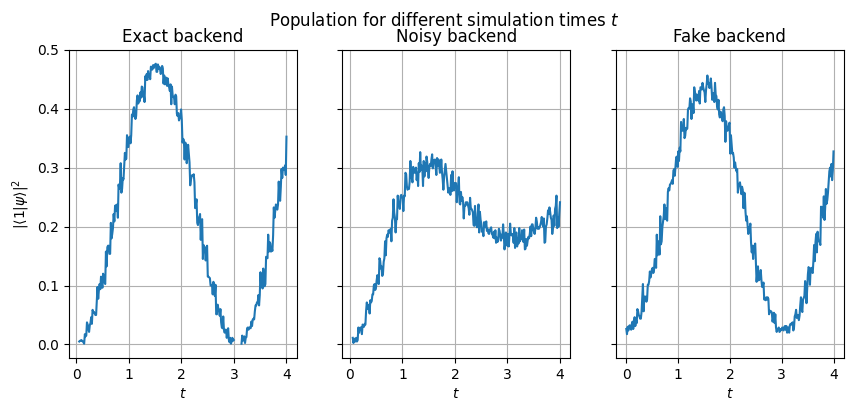

In [9]:
fig_a,ax_a = plt.subplots(nrows=1,ncols=3,figsize=(10,4),sharey=True)
fig_a.suptitle("Population for different simulation times $t$")
ax_a[0].plot(tAxis_a,populations_a[:,0] / nShots)
ax_a[0].set_xlabel("$t$")
ax_a[0].set_ylabel(r"$|\langle 1|\psi\rangle|^2$")
ax_a[0].set_title("Exact backend")
ax_a[0].grid()

ax_a[1].plot(tAxis_a,populations_a[:,1] / nShots)
ax_a[1].set_xlabel("$t$")
ax_a[1].set_title("Noisy backend")
ax_a[1].grid()

ax_a[2].plot(tAxis_a,populations_a[:,2] / nShots)
ax_a[2].set_xlabel("$t$")
ax_a[2].set_title("Fake backend")
ax_a[2].grid()

fig_a.savefig("plots/ex5_6_7_a.pdf",bbox_inches="tight")

# (6) Plotting the simulation results of exact backend, noisy backend and fake backend for smaller $\delta t$

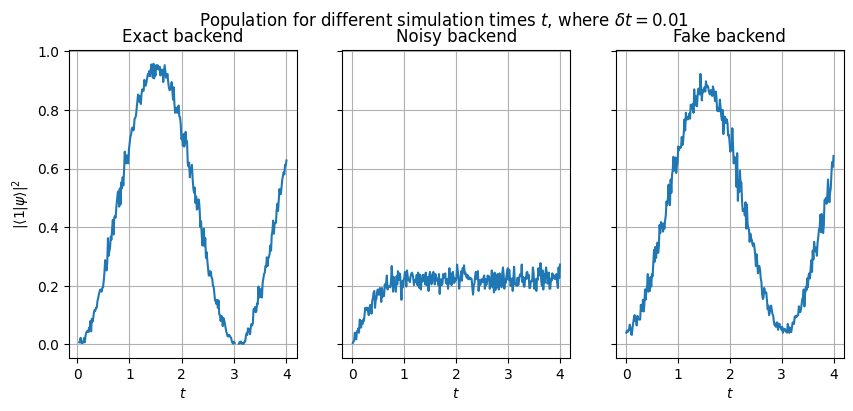

In [10]:
fig_67,ax_67 = plt.subplots(nrows=1,ncols=3,figsize=(10,4),sharey=True)
fig_67.suptitle("Population for different simulation times $t$, where $\delta t=0.01$")

ax_67[0].plot(tAxis_67,populations_67[:,0] / 400)
ax_67[0].set_xlabel("$t$")
ax_67[0].set_ylabel(r"$|\langle 1|\psi\rangle|^2$")
ax_67[0].set_title("Exact backend")
ax_67[0].grid()

ax_67[1].plot(tAxis_67,populations_67[:,1] / 400)
ax_67[1].set_xlabel("$t$")
ax_67[1].set_title("Noisy backend")
ax_67[1].grid()

ax_67[2].plot(tAxis_67,populations_67[:,2] / 400)
ax_67[2].set_xlabel("$t$")
ax_67[2].set_title("Fake backend")
ax_67[2].grid()

fig_67.savefig("plots/ex6dt.pdf",bbox_inches="tight")

# (5b) Varying detuning $\Delta$

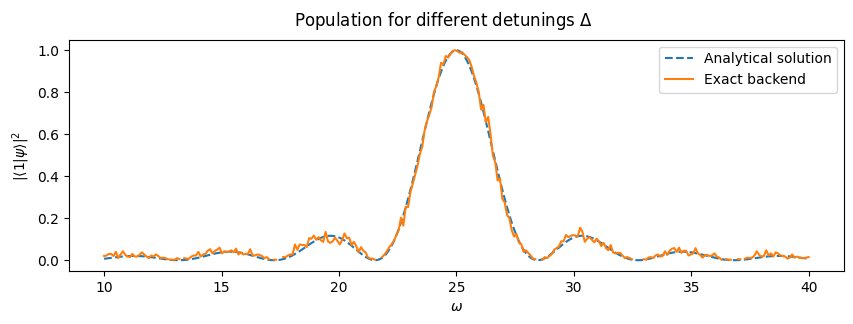

In [11]:
fig_b,ax_b = plt.subplots(nrows=1,ncols=1,figsize=(10,3))
fig_b.suptitle("Population for different detunings $\Delta$")
ax_b.plot(wAxis_b,populations_b[:,1],linestyle="--",label="Analytical solution")
ax_b.plot(wAxis_b,populations_b[:,0] / 400,label="Exact backend")
ax_b.set_xlabel("$\omega$")
ax_b.set_ylabel(r"$|\langle 1|\psi\rangle|^2$")
ax_b.legend()

fig_b.savefig("plots/ex5_6_7_b.pdf",bbox_inches="tight")

# (5c) Special case $\omega=\omega_0=\omega_1=2$

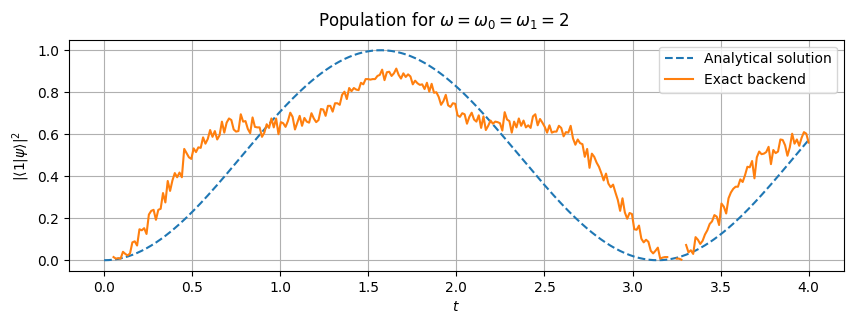

In [69]:
fig_c,ax_c = plt.subplots(nrows=1,ncols=1,figsize=(10,3))
fig_c.suptitle("Population for $\omega=\omega_0=\omega_1=2$")
ax_c.plot(tAxis_c,populations_c[:,1],linestyle="--",label="Analytical solution")
ax_c.plot(tAxis_c,populations_c[:,0] / 400,label="Exact backend")
ax_c.set_xlabel("$t$")
ax_c.set_ylabel(r"$|\langle 1|\psi\rangle|^2$")
ax_c.legend()
ax_c.grid()

fig_c.savefig("plots/ex5c.pdf",bbox_inches="tight")

# (6) Observing the $T_1$-decay

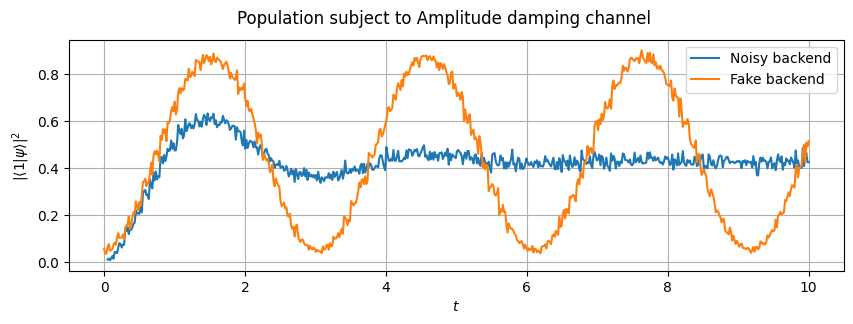

In [13]:
fig_67T1,ax_67T1 = plt.subplots(nrows=1,ncols=1,figsize=(10,3))
fig_67T1.suptitle("Population subject to Amplitude damping channel")
ax_67T1.plot(tAxis_67T1,populations_67T1[:,0] / 800,label="Noisy backend")
ax_67T1.plot(tAxis_67T1,populations_67T1[:,1] / 800,label="Fake backend")
ax_67T1.set_xlabel("$t$")
ax_67T1.set_ylabel(r"$|\langle 1|\psi\rangle|^2$")
ax_67T1.grid()
ax_67T1.legend()

fig_67T1.savefig("plots/ex67T1.pdf",bbox_inches="tight")